In [90]:
import pandas as pd
import random
from datetime import datetime
import geopandas
from pytz import timezone
import pytz
import geopy
from geopy import distance
import numpy as np
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt

#

CSE 519 -- Data Science (Fall 2018)
Prof. Steven Skiena
Homework 2: Exploratory Data Analysis in iPython
Due: Tuesday, September 25, 2018 (8:30 AM)
 
This homework will investigate doing exploratory data analysis in iPython. The goal is to get you fluent in working with the standard tools and techniques of exploratory data analysis, by working with a data set where you have some basic sense of familiarity.
 
This homework is based New York Taxi Fare Prediction on Kaggle, revolving around predicting the fare of a taxi ride given a pickup and a drop off location. More than just data exploration, you must also join the challenge and submit your model before the deadline, to get a score feedbacked from Kaggle. You are to explore the data and uncover interesting observations about the New York Taxi operations. You will need to submit all your results in a single google form and your code files in three different format (.ipynb, .pdf and .py). Make sure to have your code documented with proper comments and the exact sequence of operations you needed to produce the resulting tables and figures. The submission steps have been discussed below.

Data downloading
First of all, you need to join the challenge and download the data here. The description of the data can also be found at this page.

Python Installation 
Instead of installing python and other tools manually, we suggest to install Anaconda, which is a Python distribution with package and environment manager. It simplifies a lot of common problems when installing tools for data science. More introduction can be found at here. Installing instruction can be found here. A useful instruction about Anaconda in Youtube can be found here.

If you are an expert of Python and data science, what you need to do is install some packages relevant to data science. Some packages I believe you will definitely use for this homework are as following:
pandas
scikit-learn
numpy
matplotlib
seaborn 





Tasks (100 pts)
 
Take a look at the training data. There may be anomalies in the data that you may need to factor in before you start on the other tasks. Clean the data first to handle these issues. Explain what you did to clean the data (in bulleted form). (10 pt)
Compute the Pearson correlation between the following: (9 pt)
Euclidean distance of the ride and the taxi fare
time of day and distance traveled
time of day and the taxi fare
	Which has the highest correlation?
For each subtask of (2), create a plot visualizing the relation between the variables. Comment on whether you see non-linear or any other interesting relations. (9 pt)
Create an exciting plot of your own using the dataset that you think reveals something very interesting.   Explain what it is, and anything else you learned. (15 pt)
Generate additional features like those from (2) from the given data set. What additional features can you create? (10 pt)
Set up a simple linear regression model to predict taxi fare. Use your generated features from the previous task if applicable. How well/badly does it work? What are the coefficients for your features? Which variable(s) are the most important one? (12 pt)
Consider external datasets that may be helpful to expand your feature set. Give bullet points explaining all the datasets you could identify that would help improve your predictions. If possible, try finding such datasets online to incorporate into your training. List any that you were able to use in your analysis. (10 pt)
Now, try to build a better prediction model that works harder to solve the task. Perhaps it will still use linear regression but with new features. Perhaps it will preprocess features better (e.g. normalize or scale the input vector, convert non-numerical value into float, or do a special treatment of missing values). Perhaps it will use a different machine learning approach (e.g. nearest neighbors, random forests, etc). Briefly explain what you did differently here versus the simple model. Which of your models minimizes the squared error? (10 pt)
Predict all the taxi fares for instances at file “sample_submission.csv”. Write the result into a csv file and submit it to the website. You should do this for every model you develop. Report the rank, score, number of entries, for your highest rank. Include a snapshot of your best score on the leaderboard as confirmation. (15 pt)

	Be honest. This is your first modelling experience, and I am hoping to see you learned something, not just where you are ranked on the leaderboard.
 
 



Rules of the Game
 
This assignment must be done individually by each student. It is not a group activity.
If you do not have much experience with Python and the associated tools, this homework will be a substantial amount of work. Get started on it as early as possible!
All of your written responses will be submitted through a form during submission. It may make sense to keep your answers inside your notebook and copy it over into the form when you are ready to submit.
We will discuss topics like linear regression in detail only after the HW is due. Muddle along for now, and we will understand the issues better when we discuss them in the course.
To ensure that you are who you are when submitting your models, have your Kaggle profile show your face as well as a Stony Brook affiliation.
There are some public discussions and demos relevant to this problem on Kaggle. It is  okay for students to read these discussions, but they must write the code and analyze the data by themselves.
Our class Piazza account is an excellent place to discuss the assignment. Check it out at piazza.com/stonybrook/fall2018/cse519. 

Submission

Submit everything through Google classroom. As mentioned above, you will need to upload:
The Jupyter notebook all your work is in (.ipynb file)
Python file (export the notebook as .py)
PDF (export the notebook as a pdf file)

For everything else, you will fill out a separate Google Form. These will include the responses to all of the task questions above. You will also need to link your Kaggle profile. It is recommended that you have a look at the Google response form for the questions asked and write all your responses in a local document. Once you feel comfortable with your responses, you may record your final responses in the form and then submit.


# Randomly READ ONLY 1% data and analysis it 

In [91]:
#p = 0.01  # 1% of the lines
#df = pd.read_csv("D:/CSE519/all/train.csv", header=0, skiprows=lambda i: i>0 and random.random() > p)

ROWS=900000
df = pd.read_csv("D:/CSE519/all/train.csv", nrows=ROWS)


In [3]:
df.shape

(900000, 8)

In [4]:
df = df.dropna()
df.shape

(899990, 8)

In [5]:
df['pickup_easternTime'] = pd.to_datetime(df['pickup_datetime']).dt.tz_localize('utc').dt.tz_convert('America/New_York')

In [51]:
df.drop(['pickup_datetime'],axis=1,inplace=True)
df.shape

ValueError: labels ['pickup_datetime'] not contained in axis

In [50]:
df.head()

,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_easternTime,year,dayofweek,month,hour,minute
0,2009-06-15 17:26:21.0000001,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15 13:26:21-04:00,2009,0,6,13,26
1,2010-01-05 16:52:16.0000002,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05 11:52:16-05:00,2010,1,1,11,52
2,2011-08-18 00:35:00.00000049,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-17 20:35:00-04:00,2011,2,8,20,35
3,2012-04-21 04:30:42.0000001,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21 00:30:42-04:00,2012,5,4,0,30
4,2010-03-09 07:51:00.000000135,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09 02:51:00-05:00,2010,1,3,2,51


In [8]:
dataTime=pd.DatetimeIndex(df['pickup_easternTime'])
df['year'] = dataTime.year
df['dayofweek']=dataTime.dayofweek;
df['month'] = dataTime.month
df['hour'] = dataTime.hour
df['minute'] = dataTime.minute

In [9]:
df.head()

,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_easternTime,year,dayofweek,month,hour,minute
0,2009-06-15 17:26:21.0000001,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15 13:26:21-04:00,2009,0,6,13,26
1,2010-01-05 16:52:16.0000002,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05 11:52:16-05:00,2010,1,1,11,52
2,2011-08-18 00:35:00.00000049,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-17 20:35:00-04:00,2011,2,8,20,35
3,2012-04-21 04:30:42.0000001,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21 00:30:42-04:00,2012,5,4,0,30
4,2010-03-09 07:51:00.000000135,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09 02:51:00-05:00,2010,1,3,2,51


# filter the data based on fare_amount, passengers etc

In [10]:
df_fare_filter = df.loc[ (df['fare_amount']>2.5) & (df['passenger_count']>0) & (df['passenger_count']<=6)]

In [52]:
df_fare_filter.shape

(875153, 13)

# filter out rows with INvalid logitude Latitude 
Raleigh,NC (SOUTH point) 35.7796° N, 78.6382° W
Boston, MA (NORTH point) 42.3601° N, 71.0589° W
Philadelphia, PA(WEST point) 39.9526° N, 75.1652° W
Montauk, NY (EAST point) 41.0359° N, 71.9545° W

In [12]:
south= 35.7796
north= 42.3601
west= -75.1652
east= -71.9545

df_location_MiddleFilter=df_fare_filter.loc[   (df_fare_filter['pickup_longitude']>west) \
                                        & (df_fare_filter['pickup_longitude']<east)\
                                        & (df_fare_filter['pickup_latitude']>south)\
                                        & (df_fare_filter['pickup_latitude']<north)\
                                        & (df_fare_filter['dropoff_longitude']>west)\
                                        & (df_fare_filter['dropoff_longitude']<east)\
                                        & (df_fare_filter['dropoff_latitude']>south)\
                                        & (df_fare_filter['dropoff_latitude']<north)]

df_fare_filter=df_location_MiddleFilter


In [13]:
df_fare_filter.shape

(875153, 13)

# SET Longitude and Latitude boundaries of NYC, filter out the rows with both pickup and dropoff location outside NYC
South Amboy, NJ (SOUTH point)  40.4779°, -74.2907° \
Paterson NJ (NORTH point) -40.9168° , -74.1718° \
Perth Amboy, NJ (WEST point)  40.5068°, -74.2654° \
Garden City NY (EAST point) 40.7268° , -73.6343° 

In [14]:
south= 40.4779
north= 40.9168
west= -74.2654
east= -73.6343

print("Select the rows with EITHER pickup locaiton Or dropoff Location within NYC")
  
df_location_filter=df_fare_filter.loc[  ( (df_fare_filter['pickup_longitude']>west) \
                                        & (df_fare_filter['pickup_longitude']<east)\
                                        & (df_fare_filter['pickup_latitude']>south)\
                                        & (df_fare_filter['pickup_latitude']<north))\
                                        | ((df_fare_filter['dropoff_longitude']>west)\
                                        & (df_fare_filter['dropoff_longitude']<east)\
                                        & (df_fare_filter['dropoff_latitude']>south)\
                                        & (df_fare_filter['dropoff_latitude']<north))]
                                     
    

Select the rows with EITHER pickup locaiton Or dropoff Location within NYC


In [15]:
df_location_filter.shape

(874543, 13)

# Calculate the distance travelled in each Trip add as new feature in dataframe

In [16]:
# pickup_latlogPair= list(zip(df_location_filter['pickup_latitude'], df_location_filter['pickup_longitude']))
# if 'pickup_latlogPair' in df_location_filter.columns:
#     df_location_filter.drop(['pickup_latlogPair'],axis=1,inplace=True)
# df_location_filter.insert(13,'pickup_latlogPair',pickup_latlogPair)

# dropoff_latlogPair= list(zip(df_location_filter['dropoff_latitude'], df_location_filter['dropoff_longitude']))
# if 'dropoff_latlogPair' in df_location_filter.columns:
#     df_location_filter.drop(['dropoff_latlogPair'],axis=1,inplace=True)
# df_location_filter.insert(13,'dropoff_latlogPair',dropoff_latlogPair)



In [17]:
#df_location_filter.head()

,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_easternTime,year,dayofweek,month,hour,minute,dropoff_latlogPair,pickup_latlogPair
0,2009-06-15 17:26:21.0000001,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15 13:26:21-04:00,2009,0,6,13,26,"(40.712278000000005, -73.84161)","(40.721319, -73.844311)"
1,2010-01-05 16:52:16.0000002,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05 11:52:16-05:00,2010,1,1,11,52,"(40.782004, -73.979268)","(40.711303, -74.016048)"
2,2011-08-18 00:35:00.00000049,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-17 20:35:00-04:00,2011,2,8,20,35,"(40.750562, -73.991242)","(40.76127, -73.982738)"
3,2012-04-21 04:30:42.0000001,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21 00:30:42-04:00,2012,5,4,0,30,"(40.758092, -73.991567)","(40.733143, -73.98713000000001)"
4,2010-03-09 07:51:00.000000135,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09 02:51:00-05:00,2010,1,3,2,51,"(40.783762, -73.956655)","(40.768008, -73.96809499999999)"


In [18]:
def travelDistance(x):
    coord1=(x['pickup_latitude'], x['pickup_longitude'])
    coord2=(x['dropoff_latitude'], x['dropoff_longitude'])
    return geopy.distance.vincenty(coord1, coord2).miles

def distanceToJFK(x):
    jfk=(40.6413, -73.7781)
    coords=x
    return geopy.distance.vincenty(jfk, coords).miles
    
    
def distanceToManhattan(x):
    Manhattan=(40.7831, -73.9712)
    coords=x
    return geopy.distance.vincenty(Manhattan, coords).miles  

def distanceToNewark(x):
    NewWark=(40.7357, -74.1724)
    coords=x
    return geopy.distance.vincenty(NewWark, coords).miles  
    


In [19]:
df_location_filter.shape

(874543, 15)

In [20]:
travelDistanceArray=df_location_filter.apply(travelDistance, axis=1)

if 'travelDistance' in df_location_filter.columns:
    df_location_filter.drop(['travelDistance'],axis=1,inplace=True)
df_location_filter.insert(13,'travelDistance',travelDistanceArray)
df_location_filter.head()

,key,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_easternTime,year,dayofweek,month,hour,minute,travelDistance,dropoff_latlogPair,pickup_latlogPair
0,2009-06-15 17:26:21.0000001,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15 13:26:21-04:00,2009,0,6,13,26,0.639764,"(40.712278000000005, -73.84161)","(40.721319, -73.844311)"
1,2010-01-05 16:52:16.0000002,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05 11:52:16-05:00,2010,1,1,11,52,5.246511,"(40.782004, -73.979268)","(40.711303, -74.016048)"
2,2011-08-18 00:35:00.00000049,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-17 20:35:00-04:00,2011,2,8,20,35,0.863167,"(40.750562, -73.991242)","(40.76127, -73.982738)"
3,2012-04-21 04:30:42.0000001,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21 00:30:42-04:00,2012,5,4,0,30,1.737223,"(40.758092, -73.991567)","(40.733143, -73.98713000000001)"
4,2010-03-09 07:51:00.000000135,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09 02:51:00-05:00,2010,1,3,2,51,1.241710,"(40.783762, -73.956655)","(40.768008, -73.96809499999999)"


# check if there is travelDistance ==0 and fare_amount!=0

In [21]:
NotPossible =df_location_filter.loc[ (df_location_filter['travelDistance']==0 )& (df_location_filter['fare_amount']!=0)]
NotPossible.shape

(8518, 16)

In [22]:
df_clean_Zerodistance= df_location_filter.loc[ (df_location_filter['travelDistance']!=0 )| (df_location_filter['fare_amount']==0)]
df_clean_Zerodistance.shape

(866025, 16)

# Final Clean data 

In [23]:
df_clean=df_clean_Zerodistance

# calculate the distance between pickup/dropoff location to airport 
# calculate the distance between pickup/dropoff location to manhanttan


# Find out the boundary Latitude and Longitude of JFK  and  Manhanttan 

JFK is (40.6413, -73.7781) Manhattan is (40.7831, -73.9712)

In [24]:
def findLatLogRange(X, Y, linspaceNumber, min_dist):
    arr_range=np.linspace(-linspaceNumber, linspaceNumber, num=100)
    lat_arr=[]
    log_arr=[]
    for elem in arr_range:
        dist_lat=geopy.distance.vincenty((X,Y), (X+elem,Y)).miles
        if ((dist_lat>=min_dist) & (dist_lat<=min_dist+0.1)):
            lat_arr.append(elem)
        dist_log=geopy.distance.vincenty((X,Y), (X,Y+elem)).miles
        if ((dist_log>=min_dist) & (dist_log<=min_dist+0.1)):
            log_arr.append(elem)
    return [lat_arr,log_arr]
    
# find JFK range 
JFKLat=findLatLogRange(40.6413,-73.7781,0.01,0.5)[0]
#print(JFKLat)
print("JFK latitute range is within "+ str(40.6413+JFKLat[0])+ " and "+ str(40.6413-JFKLat[0]))
JFKLog=findLatLogRange(40.6413,-73.7781,0.01,0.5)[1]
#print(JFKLog)
print("JFK longitute range is within "+ str(-73.7781+JFKLog[0])+ " and "+ str(-73.7781-JFKLat[0]))
ManhattanLat=findLatLogRange(40.7831, -73.9712,0.25, 6)[0]
#print(ManhattanLat)
print("Manhattan latitute range is within "+ str(40.7831+ManhattanLat[0])+ " and "+ str(40.7831-ManhattanLat[0]))
ManhattanLog=findLatLogRange(40.7831, -73.9712,0.5,6)[1]
#print(ManhattanLog)
print("Manhattan longitude range is within "+ str(-73.9712+ManhattanLog[0])+ " and "+str( -73.9712-ManhattanLog[0]))

  
    


JFK latitute range is within 40.63271414141414 and 40.64988585858586
JFK longitute range is within -73.7881 and -73.76951414141413
Manhattan latitute range is within 40.69471616161616 and 40.87148383838384
Manhattan longitude range is within -74.08736161616162 and -73.85503838383838


In [25]:
pickup_jfk=df_clean['pickup_latlogPair'].apply(distanceToJFK)
dropoff_jfk=df_clean['dropoff_latlogPair'].apply(distanceToJFK)
pickup_manhattan=df_clean['pickup_latlogPair'].apply(distanceToManhattan)
dropoff_manhattan=df_clean['dropoff_latlogPair'].apply(distanceToManhattan)

In [26]:
df_clean.insert(15,'pickup_jfk',pickup_jfk)
df_clean.insert(15,'dropoff_jfk',dropoff_jfk)
df_clean.insert(15,'pickup_manhattan',pickup_manhattan)
df_clean.insert(15,'dropoff_manhattan',dropoff_manhattan)

In [27]:
pickup_newark=df_clean['pickup_latlogPair'].apply(distanceToNewark)
dropoff_newark=df_clean['dropoff_latlogPair'].apply(distanceToNewark)
df_clean.insert(15,'pickup_newark',pickup_newark)
df_clean.insert(15,'dropoff_newark',dropoff_newark)

In [28]:
if 'pickup_latlogPair' in df_clean.columns:
    df_clean.drop(['pickup_latlogPair'],axis=1,inplace=True)
if 'dropoff_latlogPair' in df_clean.columns:
    df_clean.drop(['dropoff_latlogPair'],axis=1,inplace=True)

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [29]:
df_clean.reset_index().to_feather('D:/CSE519/all/df_clean'+str(ROWS))
#advanced_filter_df.reset_index().to_feather('./all/advanced_filter-' + str(ROWS))

In [281]:
df_clean=pd.read_feather('D:/CSE519/all/df_clean900000')
# add a filter to filter out the fees that is less than 2.8+2.5*distance 

In [290]:
# import gmplot
# df_map=df = pd.read_csv("D:/CSE519/all/train.csv", nrows=10)
# lat=df_map['pickup_latitude'].values
# log=df_map['pickup_longitude'].values
# gmap_plt = gmplot.GoogleMapPlotter(40.7128, -74.0060, 12)
# gmap_plt.scatter(lat, log,size=100, marker=False)
# gmap_plt.draw('519map.html')

In [268]:

df_clean2= df_clean.loc[df_clean['fare_amount']>=2.8+df_clean['travelDistance']*2.5]
df_clean2.shape

df_clean3=df_clean2.loc[(df_clean2['travelDistance']>10) | (df_clean2['fare_amount']<100)]
df_clean3.shape

(775554, 21)

In [269]:
df_clean.shape

(866025, 21)

In [270]:
df_clean=df_clean3

In [271]:
df_clean.shape

(775554, 21)

# Part2. (1) Compute the Pearson correlation between Euclidean distance of the ride and the taxi fare

In [272]:
df_clean['travelDistance'].corr(df_clean['fare_amount'])

0.8983617092294527

# Part2.(2)Compute the Pearson correlation between time of day and distance traveled

In [273]:
timeofday=df_clean['hour']+df_clean['minute']/60
if 'timeofday' in df_clean.columns:
    df_clean.drop(['timeofday'],axis=1,inplace=True)
df_clean.insert(13,'timeofday',timeofday)


In [274]:
df_clean['timeofday'].corr(df_clean['travelDistance'])

0.028700407872222482

# Part2. (3)compute the Pearson correlation between time of day and the taxi fare

In [245]:
df_clean['timeofday'].corr(df_clean['fare_amount'])

-0.007801330483902239

# Part3.(1) scatter plot of dist and fare_amout

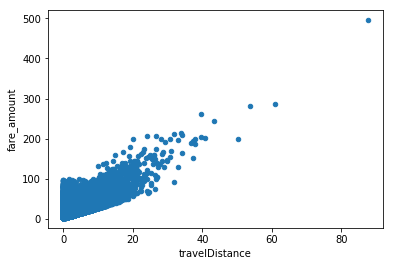

In [246]:
plot3_1=df_clean.plot(kind='scatter',x='travelDistance',y='fare_amount')

# Part3.(2) scatter plot of timeofday and distance

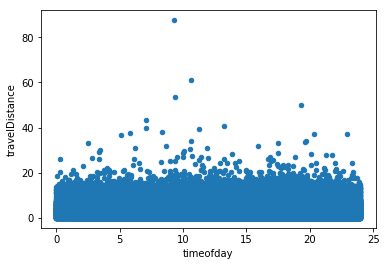

In [247]:
plot3_2=df_clean.plot(kind='scatter',x='timeofday', y='travelDistance')

# Part3.(3) scatter plot of timeofday and fare_amount

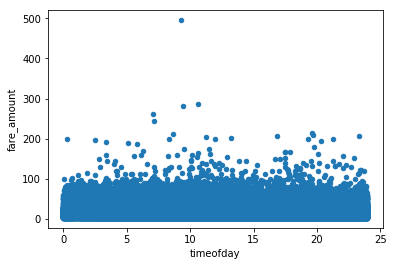

In [248]:
plot3_3=df_clean.plot(kind='scatter',x='timeofday', y='fare_amount')

# Part4: Create an exciting plot of your own using the dataset that you think reveals something very interesting. 

In [275]:
if 'pickup_latlogPair' in df_clean.columns:
    df_clean.drop(['pickup_latlogPair'],axis=1,inplace=True)
if 'dropoff_latlogPair' in df_clean.columns:
    df_clean.drop(['dropoff_latlogPair'],axis=1,inplace=True)
if 'pickup_latitude' in df_clean.columns:
    df_clean.drop(['pickup_latitude'],axis=1,inplace=True)
if 'pickup_longitude' in df_clean.columns:
    df_clean.drop(['pickup_longitude'],axis=1,inplace=True)
if 'dropoff_latitude' in df_clean.columns:
    df_clean.drop(['dropoff_latitude'],axis=1,inplace=True)
if 'dropoff_longitude' in df_clean.columns:
    df_clean.drop(['dropoff_longitude'],axis=1,inplace=True)
if 'passenger_count' in df_clean.columns:
    df_clean.drop(['passenger_count'],axis=1,inplace=True)


C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: ht

In [250]:
df_clean.head()

,index,key,fare_amount,pickup_easternTime,year,dayofweek,month,hour,timeofday,minute,travelDistance,dropoff_newark,pickup_newark,dropoff_manhattan,pickup_manhattan,dropoff_jfk,pickup_jfk
0,0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 13:26:21-04:00,2009,0,6,13,13.433333,26,0.639764,17.440404,17.250965,8.374388,7.906224,5.926067,6.525606
1,1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 11:52:16-05:00,2010,1,1,11,11.866667,52,5.246511,10.625267,8.378874,0.429876,5.484811,14.346804,13.401180
2,2,2011-08-18 00:35:00.00000049,5.7,2011-08-17 20:35:00-04:00,2011,2,8,20,20.583333,35,0.863167,9.562611,10.108149,2.479228,1.623390,13.496117,13.565196
3,3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 00:30:42-04:00,2012,5,4,0,0.500000,30,1.737223,9.614833,9.726136,2.029625,3.547060,13.806452,12.677118
5,5,2011-01-06 09:50:45.0000002,12.1,2011-01-06 04:50:45-05:00,2011,3,1,4,4.833333,50,2.353742,10.584719,9.002894,1.718191,3.879777,13.028735,13.262133


In [276]:
df_clean['isWeekday'] = -1
#0 monday, 6 sunday
df_clean.loc[(df_clean['dayofweek'] >= 0) & (df_clean['dayofweek'] <=4), 'isWeekday'] = 1
df_clean.loc[(df_clean['dayofweek'] >= 5) & (df_clean['dayofweek'] <= 6), 'isWeekday'] = 0
df_clean.head()

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,index,key,fare_amount,pickup_easternTime,year,dayofweek,month,hour,timeofday,minute,travelDistance,dropoff_newark,pickup_newark,dropoff_manhattan,pickup_manhattan,dropoff_jfk,pickup_jfk,isWeekday
0,0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 13:26:21-04:00,2009,0,6,13,13.433333,26,0.639764,17.440404,17.250965,8.374388,7.906224,5.926067,6.525606,1
1,1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 11:52:16-05:00,2010,1,1,11,11.866667,52,5.246511,10.625267,8.378874,0.429876,5.484811,14.346804,13.401180,1
2,2,2011-08-18 00:35:00.00000049,5.7,2011-08-17 20:35:00-04:00,2011,2,8,20,20.583333,35,0.863167,9.562611,10.108149,2.479228,1.623390,13.496117,13.565196,1
3,3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 00:30:42-04:00,2012,5,4,0,0.500000,30,1.737223,9.614833,9.726136,2.029625,3.547060,13.806452,12.677118,0
5,5,2011-01-06 09:50:45.0000002,12.1,2011-01-06 04:50:45-05:00,2011,3,1,4,4.833333,50,2.353742,10.584719,9.002894,1.718191,3.879777,13.028735,13.262133,1


In [277]:
df_clean['isJFK_Manhattan'] = 0
df_clean.loc[ ((df_clean['pickup_jfk'] <=1) & (df_clean['dropoff_manhattan'] <=3))\
             | ((df_clean['pickup_manhattan'] <= 3) & (df_clean['dropoff_jfk'] <= 1) ), 'isJFK_Manhattan'] = 1
df_clean.head()

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,index,key,fare_amount,pickup_easternTime,year,dayofweek,month,hour,timeofday,minute,travelDistance,dropoff_newark,pickup_newark,dropoff_manhattan,pickup_manhattan,dropoff_jfk,pickup_jfk,isWeekday,isJFK_Manhattan
0,0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 13:26:21-04:00,2009,0,6,13,13.433333,26,0.639764,17.440404,17.250965,8.374388,7.906224,5.926067,6.525606,1,0
1,1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 11:52:16-05:00,2010,1,1,11,11.866667,52,5.246511,10.625267,8.378874,0.429876,5.484811,14.346804,13.401180,1,0
2,2,2011-08-18 00:35:00.00000049,5.7,2011-08-17 20:35:00-04:00,2011,2,8,20,20.583333,35,0.863167,9.562611,10.108149,2.479228,1.623390,13.496117,13.565196,1,0
3,3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 00:30:42-04:00,2012,5,4,0,0.500000,30,1.737223,9.614833,9.726136,2.029625,3.547060,13.806452,12.677118,0,0
5,5,2011-01-06 09:50:45.0000002,12.1,2011-01-06 04:50:45-05:00,2011,3,1,4,4.833333,50,2.353742,10.584719,9.002894,1.718191,3.879777,13.028735,13.262133,1,0


In [253]:
jfkM=df_clean.loc[df_clean['isJFK_Manhattan']==1]

In [254]:
jfkM.describe()

,index,fare_amount,year,dayofweek,month,hour,timeofday,minute,travelDistance,dropoff_newark,pickup_newark,dropoff_manhattan,pickup_manhattan,dropoff_jfk,pickup_jfk,isWeekday,isJFK_Manhattan
count,8842.000000,8842.000000,8842.000000,8842.000000,8842.000000,8842.000000,8842.000000,8842.000000,8842.000000,8842.000000,8842.000000,8842.000000,8842.000000,8842.000000,8842.000000,8842.000000,8842.0
mean,450560.888374,52.402522,2012.032459,2.980208,6.550893,10.114793,10.599312,29.071138,12.965363,15.050371,16.841738,6.706232,8.708421,8.042541,5.850155,0.719068,1.0
std,260927.451980,4.952220,1.856145,2.033303,3.398264,5.356243,5.356549,17.262278,0.682805,5.317851,5.330359,5.887908,5.889831,6.376779,6.369331,0.449480,0.0
min,132.000000,30.900000,2009.000000,0.000000,1.000000,0.000000,0.000000,0.000000,10.459340,8.785074,8.795273,0.050882,0.013961,0.230693,0.153540,0.000000,1.0
25%,224643.250000,49.570000,2011.000000,1.000000,4.000000,6.000000,6.633333,14.000000,12.527971,10.278128,10.519983,1.669934,1.910052,0.568345,0.434370,0.000000,1.0
50%,451527.500000,50.500000,2012.000000,3.000000,6.000000,10.000000,10.800000,29.000000,12.907353,11.744471,21.028716,2.512910,13.399358,12.800541,0.708326,1.000000,1.0
75%,676829.000000,57.330000,2014.000000,5.000000,10.000000,14.000000,14.350000,44.000000,13.354992,21.275571,21.318744,13.575070,13.761345,13.480445,13.183648,1.000000,1.0
max,899911.000000,114.300000,2015.000000,6.000000,12.000000,23.000000,23.983333,59.000000,15.623450,21.901928,22.078205,14.543431,14.462033,16.096934,15.588406,1.000000,1.0


In [255]:
# A simple test to show that my category variable is correctly set

#jfkM.ix[jfkM['fare_amount'].idxmin()]
test=jfkM.loc[jfkM['fare_amount']<45]
test

,index,key,fare_amount,pickup_easternTime,year,dayofweek,month,hour,timeofday,minute,travelDistance,dropoff_newark,pickup_newark,dropoff_manhattan,pickup_manhattan,dropoff_jfk,pickup_jfk,isWeekday,isJFK_Manhattan
1317,1368,2009-12-02 19:15:22.0000006,39.7,2009-12-02 14:15:22-05:00,2009,2,12,14,14.250000,15,10.842007,12.509888,21.186976,2.860905,13.698274,11.240289,0.548704,1,1
1549,1607,2011-06-15 14:17:02.0000001,33.7,2011-06-15 10:17:02-04:00,2011,2,6,10,10.283333,17,11.895108,13.824077,21.440337,2.866657,13.772458,12.213544,0.319233,1,1
2162,2243,2013-12-23 21:51:01.0000002,43.5,2013-12-23 16:51:01-05:00,2013,0,12,16,16.850000,51,11.005141,12.955165,21.071585,2.623672,13.527922,11.549802,0.639185,1,1
6081,6321,2014-06-07 07:37:24.0000002,42.0,2014-06-07 03:37:24-04:00,2014,5,6,3,3.616667,37,11.289588,12.896427,21.438541,2.563333,13.777549,11.602677,0.313091,0,1
8049,8360,2009-09-03 14:37:18.0000002,36.1,2009-09-03 10:37:18-04:00,2009,3,9,10,10.616667,37,11.095756,11.613696,21.300313,2.764744,13.542592,11.622696,0.575443,1,1
11333,11769,2013-04-27 12:13:00.00000097,41.5,2013-04-27 08:13:00-04:00,2013,5,4,8,8.216667,13,11.256036,13.390272,21.041376,2.683253,13.505070,11.800492,0.669629,0,1
13939,14490,2012-06-15 10:04:00.000000153,36.9,2012-06-15 06:04:00-04:00,2012,4,6,6,6.066667,4,11.129642,12.337346,21.694112,2.866958,13.943816,11.265200,0.297279,1,1
17446,18123,2009-04-12 18:58:00.00000091,32.9,2009-04-12 14:58:00-04:00,2009,6,4,14,14.966667,58,11.897312,13.068547,21.446894,2.266825,13.778409,12.210895,0.313598,0,1
19293,20051,2013-09-21 18:24:00.000000253,44.5,2013-09-21 14:24:00-04:00,2013,5,9,14,14.400000,24,11.360476,12.228540,21.502315,2.464527,13.806855,11.641443,0.300876,0,1
24109,25043,2014-01-13 07:09:14.0000001,42.5,2014-01-13 02:09:14-05:00,2014,0,1,2,2.150000,9,10.775961,13.076815,21.025949,2.713548,13.370418,11.488275,0.726047,1,1


In [280]:
df_clean['isToNewark'] = 0
df_clean.loc[ (df_clean['dropoff_newark'] <=1), 'isToNewark'] = 1
df_clean.head()

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,index,key,fare_amount,pickup_easternTime,year,dayofweek,month,hour,timeofday,minute,...,dropoff_newark,pickup_newark,dropoff_manhattan,pickup_manhattan,dropoff_jfk,pickup_jfk,isWeekday,isJFK_Manhattan,is8pm_6am,isToNewark
0,0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 13:26:21-04:00,2009,0,6,13,13.433333,26,...,17.440404,17.250965,8.374388,7.906224,5.926067,6.525606,1,0,0,0
1,1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 11:52:16-05:00,2010,1,1,11,11.866667,52,...,10.625267,8.378874,0.429876,5.484811,14.346804,13.401180,1,0,0,0
2,2,2011-08-18 00:35:00.00000049,5.7,2011-08-17 20:35:00-04:00,2011,2,8,20,20.583333,35,...,9.562611,10.108149,2.479228,1.623390,13.496117,13.565196,1,0,1,0
3,3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 00:30:42-04:00,2012,5,4,0,0.500000,30,...,9.614833,9.726136,2.029625,3.547060,13.806452,12.677118,0,0,1,0
5,5,2011-01-06 09:50:45.0000002,12.1,2011-01-06 04:50:45-05:00,2011,3,1,4,4.833333,50,...,10.584719,9.002894,1.718191,3.879777,13.028735,13.262133,1,0,1,0


In [257]:
df_clean['is4pm_8pm'] = 0
df_clean.loc[ ((df_clean['timeofday']>=16) & (df_clean['timeofday'] <=20) &(df_clean['isWeekday']==1)), 'is4pm_8pm'] = 1
df_clean.head()

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,index,key,fare_amount,pickup_easternTime,year,dayofweek,month,hour,timeofday,minute,...,dropoff_newark,pickup_newark,dropoff_manhattan,pickup_manhattan,dropoff_jfk,pickup_jfk,isWeekday,isJFK_Manhattan,isToNewark,is4pm_8pm
0,0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 13:26:21-04:00,2009,0,6,13,13.433333,26,...,17.440404,17.250965,8.374388,7.906224,5.926067,6.525606,1,0,0,0
1,1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 11:52:16-05:00,2010,1,1,11,11.866667,52,...,10.625267,8.378874,0.429876,5.484811,14.346804,13.401180,1,0,0,0
2,2,2011-08-18 00:35:00.00000049,5.7,2011-08-17 20:35:00-04:00,2011,2,8,20,20.583333,35,...,9.562611,10.108149,2.479228,1.623390,13.496117,13.565196,1,0,0,0
3,3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 00:30:42-04:00,2012,5,4,0,0.500000,30,...,9.614833,9.726136,2.029625,3.547060,13.806452,12.677118,0,0,0,0
5,5,2011-01-06 09:50:45.0000002,12.1,2011-01-06 04:50:45-05:00,2011,3,1,4,4.833333,50,...,10.584719,9.002894,1.718191,3.879777,13.028735,13.262133,1,0,0,0


In [279]:
#8pm to 6am.

df_clean['is8pm_6am'] = 0
df_clean.loc[ ((df_clean['timeofday']>=20) & (df_clean['timeofday'] <=23)) \
             | ((df_clean['timeofday']>=0) &  (df_clean['timeofday']<=6)) , 'is8pm_6am'] = 1
df_clean.head()

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,index,key,fare_amount,pickup_easternTime,year,dayofweek,month,hour,timeofday,minute,travelDistance,dropoff_newark,pickup_newark,dropoff_manhattan,pickup_manhattan,dropoff_jfk,pickup_jfk,isWeekday,isJFK_Manhattan,is8pm_6am
0,0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 13:26:21-04:00,2009,0,6,13,13.433333,26,0.639764,17.440404,17.250965,8.374388,7.906224,5.926067,6.525606,1,0,0
1,1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 11:52:16-05:00,2010,1,1,11,11.866667,52,5.246511,10.625267,8.378874,0.429876,5.484811,14.346804,13.401180,1,0,0
2,2,2011-08-18 00:35:00.00000049,5.7,2011-08-17 20:35:00-04:00,2011,2,8,20,20.583333,35,0.863167,9.562611,10.108149,2.479228,1.623390,13.496117,13.565196,1,0,1
3,3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 00:30:42-04:00,2012,5,4,0,0.500000,30,1.737223,9.614833,9.726136,2.029625,3.547060,13.806452,12.677118,0,0,1
5,5,2011-01-06 09:50:45.0000002,12.1,2011-01-06 04:50:45-05:00,2011,3,1,4,4.833333,50,2.353742,10.584719,9.002894,1.718191,3.879777,13.028735,13.262133,1,0,1


In [258]:
df_clean['isRushHour'] = 0
df_clean.loc[ ((df_clean['is4pm_8pm']==1) |((df_clean['timeofday']>=7) & (df_clean['timeofday'] <=9)) &(df_clean['isWeekday']==1))  , 'isRushHour'] = 1
df_clean.head()

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,index,key,fare_amount,pickup_easternTime,year,dayofweek,month,hour,timeofday,minute,...,pickup_newark,dropoff_manhattan,pickup_manhattan,dropoff_jfk,pickup_jfk,isWeekday,isJFK_Manhattan,isToNewark,is4pm_8pm,isRushHour
0,0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 13:26:21-04:00,2009,0,6,13,13.433333,26,...,17.250965,8.374388,7.906224,5.926067,6.525606,1,0,0,0,0
1,1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 11:52:16-05:00,2010,1,1,11,11.866667,52,...,8.378874,0.429876,5.484811,14.346804,13.401180,1,0,0,0,0
2,2,2011-08-18 00:35:00.00000049,5.7,2011-08-17 20:35:00-04:00,2011,2,8,20,20.583333,35,...,10.108149,2.479228,1.623390,13.496117,13.565196,1,0,0,0,0
3,3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 00:30:42-04:00,2012,5,4,0,0.500000,30,...,9.726136,2.029625,3.547060,13.806452,12.677118,0,0,0,0,0
5,5,2011-01-06 09:50:45.0000002,12.1,2011-01-06 04:50:45-05:00,2011,3,1,4,4.833333,50,...,9.002894,1.718191,3.879777,13.028735,13.262133,1,0,0,0,0


In [259]:
if 'index' in df_clean.columns:
    df_clean.drop(['index'],axis=1,inplace=True)
if 'pickup_easternTime' in df_clean.columns:
    df_clean.drop(['pickup_easternTime'],axis=1,inplace=True)
if 'dayofweek' in df_clean.columns:
    df_clean.drop(['dayofweek'],axis=1,inplace=True)
if 'month' in df_clean.columns:
    df_clean.drop(['month'],axis=1,inplace=True)
if 'hour' in df_clean.columns:
    df_clean.drop(['hour'],axis=1,inplace=True)
if 'minute' in df_clean.columns:
    df_clean.drop(['minute'],axis=1,inplace=True)

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

S

In [260]:
df_weiredExpensive=df_clean.loc[ (df_clean['travelDistance']<10 )& (df_clean['fare_amount']>100)]
df_weiredExpensive.shape
df_weiredExpensive

,key,fare_amount,year,timeofday,travelDistance,dropoff_newark,pickup_newark,dropoff_manhattan,pickup_manhattan,dropoff_jfk,pickup_jfk,isWeekday,isJFK_Manhattan,isToNewark,is4pm_8pm,isRushHour


In [261]:
if 'index' in df_clean.columns:
    df_clean.drop(['index'],axis=1,inplace=True)
if 'pickup_easternTime' in df_clean.columns:
    df_clean.drop(['pickup_easternTime'],axis=1,inplace=True)
if 'dayofweek' in df_clean.columns:
    df_clean.drop(['dayofweek'],axis=1,inplace=True)
if 'month' in df_clean.columns:
    df_clean.drop(['month'],axis=1,inplace=True)
if 'hour' in df_clean.columns:
    df_clean.drop(['hour'],axis=1,inplace=True)
if 'minute' in df_clean.columns:
    df_clean.drop(['minute'],axis=1,inplace=True)
if 'pickup_newark' in df_clean.columns:
    df_clean.drop(['pickup_newark'],axis=1,inplace=True)
if 'dropoff_newark' in df_clean.columns:
    df_clean.drop(['dropoff_newark'],axis=1,inplace=True)
if 'pickup_jfk' in df_clean.columns:
    df_clean.drop(['pickup_jfk'],axis=1,inplace=True)
if 'pickup_manhattan' in df_clean.columns:
    df_clean.drop(['pickup_manhattan'],axis=1,inplace=True)
if 'dropoff_jfk' in df_clean.columns:
    df_clean.drop(['dropoff_jfk'],axis=1,inplace=True)
if 'dropoff_manhattan' in df_clean.columns:
    df_clean.drop(['dropoff_manhattan'],axis=1,inplace=True)

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: 

In [262]:
df_clean.head()

,key,fare_amount,year,timeofday,travelDistance,isWeekday,isJFK_Manhattan,isToNewark,is4pm_8pm,isRushHour
0,2009-06-15 17:26:21.0000001,4.5,2009,13.433333,0.639764,1,0,0,0,0
1,2010-01-05 16:52:16.0000002,16.9,2010,11.866667,5.246511,1,0,0,0,0
2,2011-08-18 00:35:00.00000049,5.7,2011,20.583333,0.863167,1,0,0,0,0
3,2012-04-21 04:30:42.0000001,7.7,2012,0.500000,1.737223,0,0,0,0,0
5,2011-01-06 09:50:45.0000002,12.1,2011,4.833333,2.353742,1,0,0,0,0


In [ ]:
def AjustFareAmount(df):
    # Metered fare calculation:
    if (df['isJFK_Manhattan']==0): # metered fare
        df['fare_amount']=df['fare_amount']-2.8 # base charge
        if (df['is4pm_8pm']==1):
            df['fare_amount']=df['fare_amount']-1
        if (df['8pm_6am']==1)
            df['fare_amount']=df['fare_amount']-0.5
    if(df['isToNewark']):
        df['fare_amount']=df['fare_amount']-17.5-0.3-11 # 11 toll fee 
        # consider metered Rule
        if (df['is4pm_8pm']==1):
            df['fare_amount']=df['fare_amount']-1
        if (df['8pm_6am']==1)
            df['fare_amount']=df['fare_amount']-0.5
    
        
        
        

In [291]:
df_regression = df_clean.loc[df_clean['isJFK_Manhattan']==0]

KeyError: 'isJFK_Manhattan'

Coefficients: 
 [[3.89423336]]
Mean squared error: 18.32
Variance score: 0.76


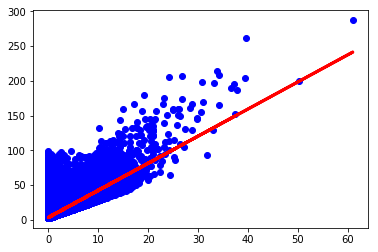

In [292]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
#train, test = split_dataFrame(df_regression, test_size=0.3)
dataFrame_size=df_regression.shape[0];
train= df_regression[:int(dataFrame_size*0.7)]
test=df_regression[int(dataFrame_size*0.3): dataFrame_size-1]


train_x = list(map(lambda x: [x], list(train.travelDistance)))
train_y = list(map(lambda x: [x], list(train.fare_amount)))
test_x = list(map(lambda x: [x], list(test.travelDistance)))
test_y = list(map(lambda x: [x], list(test.fare_amount)))
regr = linear_model.LinearRegression()
regr.fit(train_x, train_y)
fare_predict = regr.predict(test_x)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(test_y, fare_predict))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(test_y, fare_predict))

# Plot outputs
plt.scatter(test_x, test_y,  color='blue')
plt.plot(test_x, fare_predict, color='red', linewidth=3)

#plt.xticks(())
#plt.yticks(())

plt.show()



In [265]:
dfExpensive=df_regression.loc[(df_regression['travelDistance']<10) & (df_regression['fare_amount']>100)]

In [266]:
dfExpensive

,key,fare_amount,year,timeofday,travelDistance,isWeekday,isJFK_Manhattan,isToNewark,is4pm_8pm,isRushHour


In [299]:
#travelDistanceArray=df_location_filter.apply(travelDistance, axis=1)
def dist(x):
    coord1=(x['pickup_latitude'], x['pickup_longitude'])
    coord2=(x['dropoff_latitude'], x['dropoff_longitude'])
    return geopy.distance.vincenty(coord1, coord2).miles
    
test_df = pd.read_csv("D:/CSE519/all/test.csv")


test_df_dist = test_df.apply(dist, axis=1)
test_df.insert(test_df.shape[1], 'travelDistance', test_df_dist)
test_X = list(map(lambda x: [x], list(test_df.travelDistance)))
fare_predict = regr.predict(test_X).round(decimals = 2)
submission = pd.DataFrame({'key': test_df.key,'fare_amount': fare_predict.ravel()},columns = ['key', 'fare_amount'])
submission.to_csv('submission.csv', index = False)